In [43]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import numpy as mp
from matplotlib.ticker import PercentFormatter
import pandas as pd
from colorama import Fore, Back, Style
%matplotlib inline

def plot_pareto_by(df, x, y, hlines=[80]):

    df['Cumulative Percentage'] = df[y].cumsum()/df[y].sum()*100
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.bar(df[x], df[y], color='C0')
    ax2 = ax.twinx()
    ax2.plot(df[x], df['Cumulative Percentage'], color='C1', ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis='y', colors='C0')
    ax2.tick_params(axis='y', colors='C1')

    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    plt.title(f'Pareto Chart for {y} by {x}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax2.set_ylabel('Cumulative Percentage')

    for hline_at in hlines:
        ax2.axhline(y=hline_at, color='red', linestyle='-.')
    plt.show()


# Récupération de la liste de CSV si fournie
# Ou utilisation de glob

fns = !ls fao_2013/*.csv
# Lecture puis affichage des info taille des CSV
df_animal = pd.read_csv(fns[0])
df_pop = pd.read_csv(fns[1])
df_alim = pd.read_csv(fns[2])
df_veg = pd.read_csv(fns[3])

In [35]:
df_animal.describe().round(2)

,Code Pays,Code Élément,Code Produit,Code Année,Année,Valeur
count,37166.00,37166.00,37166.00,37166.0,37166.0,37166.00
mean,126.80,3511.03,2758.42,2013.0,2013.0,148.29
std,74.77,2332.28,27.45,0.0,0.0,1933.73
min,1.00,645.00,2731.00,2013.0,2013.0,-1368.00
25%,63.00,674.00,2736.00,2013.0,2013.0,0.00
50%,121.00,5142.00,2762.00,2013.0,2013.0,1.00
75%,189.00,5511.00,2767.00,2013.0,2013.0,11.00
max,351.00,5911.00,2848.00,2013.0,2013.0,135600.00


In [36]:
df_animal.corr()

,Code Pays,Code Élément,Code Produit,Code Année,Année,Valeur
Code Pays,1.000000,0.004649,-0.001336,NaN,NaN,0.027993
Code Élément,0.004649,1.000000,0.029672,NaN,NaN,0.057000
Code Produit,-0.001336,0.029672,1.000000,NaN,NaN,0.103529
Code Année,NaN,NaN,NaN,NaN,NaN,NaN
Année,NaN,NaN,NaN,NaN,NaN,NaN
Valeur,0.027993,0.057000,0.103529,NaN,NaN,1.000000


In [29]:
df_pop.describe().round(2)

,Country Code,Element Code,Item Code,Year Code,Year,Value
count,175.00,175.0,175.0,175.0,175.0,175.00
mean,126.72,511.0,2501.0,2013.0,2013.0,48079.96
std,75.17,0.0,0.0,0.0,0.0,178632.74
min,1.00,511.0,2501.0,2013.0,2013.0,54.00
25%,64.50,511.0,2501.0,2013.0,2013.0,2543.50
50%,121.00,511.0,2501.0,2013.0,2013.0,9413.00
75%,188.50,511.0,2501.0,2013.0,2013.0,28881.50
max,351.00,511.0,2501.0,2013.0,2013.0,1416667.00


In [40]:
df_pop.corr()

,Country Code,Element Code,Item Code,Year Code,Year,Value
Country Code,1.000000,NaN,NaN,NaN,NaN,0.089685
Element Code,NaN,NaN,NaN,NaN,NaN,NaN
Item Code,NaN,NaN,NaN,NaN,NaN,NaN
Year Code,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN
Value,0.089685,NaN,NaN,NaN,NaN,1.000000


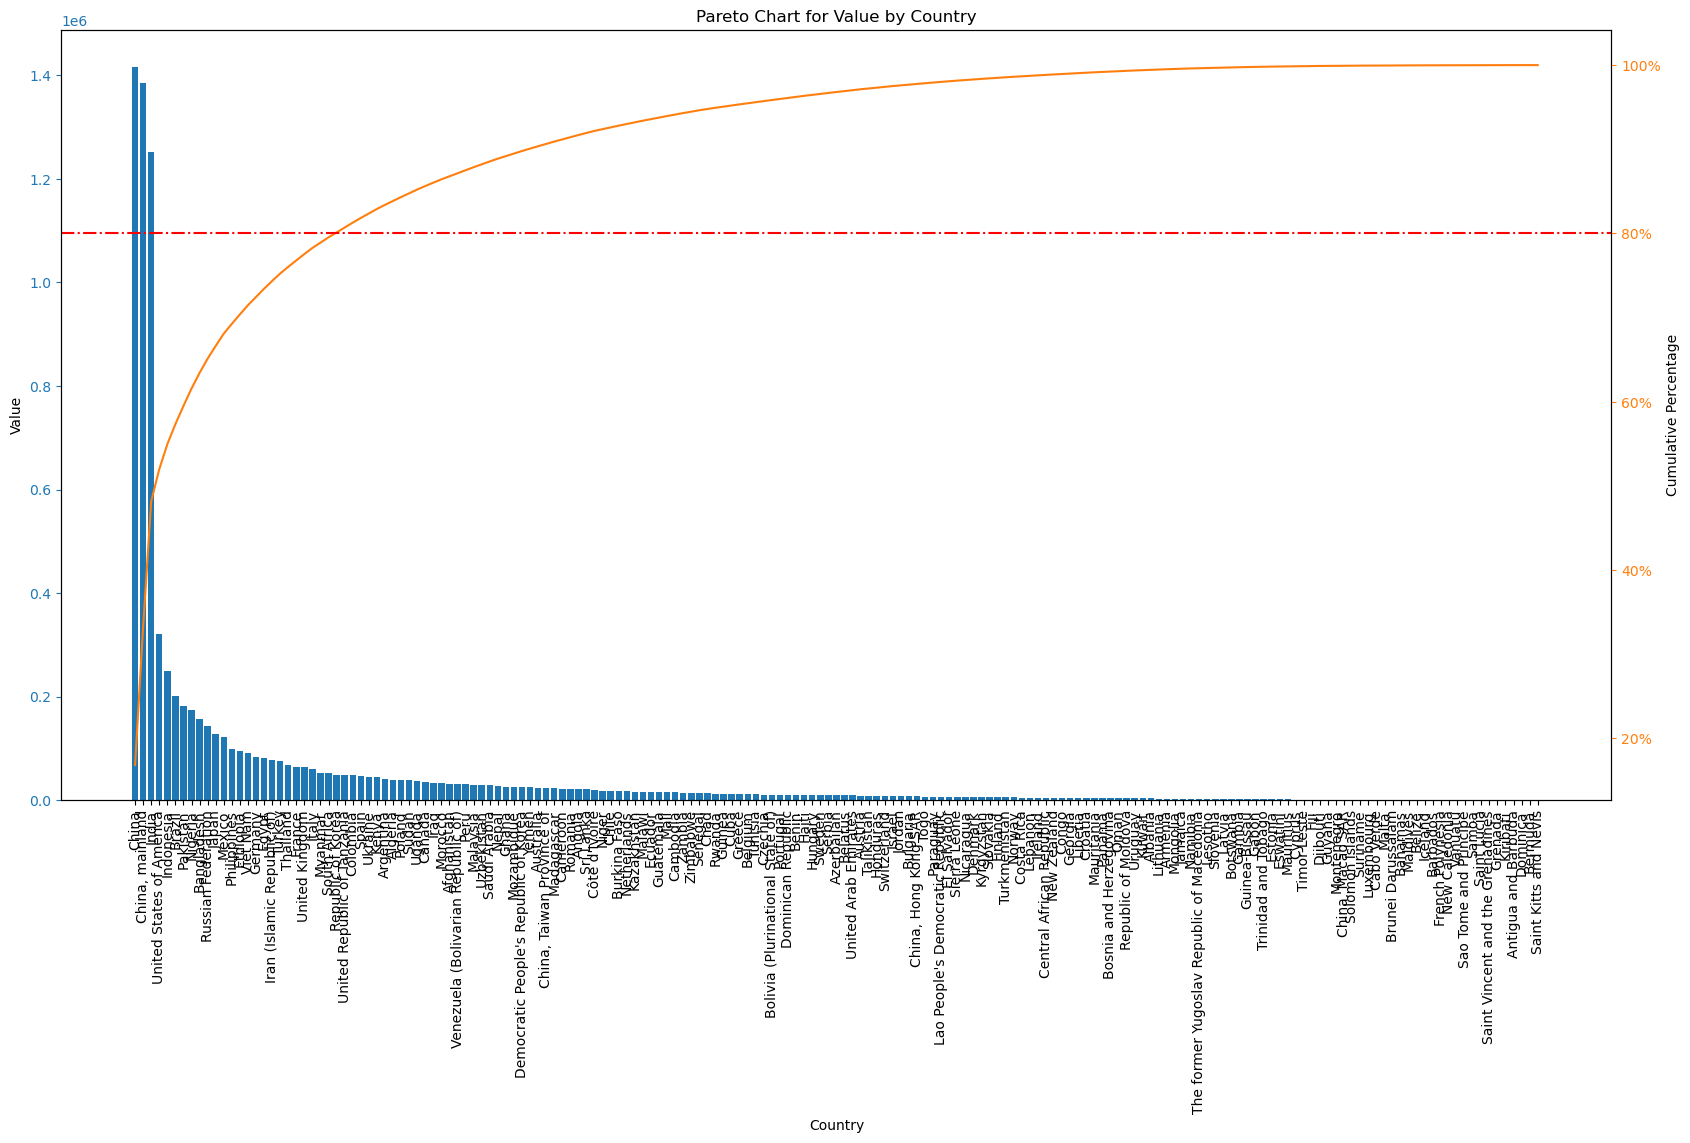

In [47]:
df_pop.dropna(subset=["Value"], inplace=True)
df_pop = df_pop.sort_values(by='Value',ascending=False)
plot_pareto_by(df_pop, 'Country', 'Value')

In [30]:
df_alim.describe().round(2)

,Code zone,Code Élément,Code Produit,Code année,Valeur
count,204.00,204.0,204.0,204.0,97.00
mean,129.26,6132.0,21001.0,20122014.0,9.04
std,76.77,0.0,0.0,0.0,28.89
min,1.00,6132.0,21001.0,20122014.0,0.10
25%,62.50,6132.0,21001.0,20122014.0,0.50
50%,127.50,6132.0,21001.0,20122014.0,1.80
75%,193.25,6132.0,21001.0,20122014.0,6.10
max,351.00,6132.0,21001.0,20122014.0,213.10


In [33]:
df_veg.describe().round(2)

,Code Pays,Code Élément,Code Produit,Code Année,Année,Valeur
count,104871.00,104871.00,104871.00,104871.0,104871.0,104871.00
mean,127.69,3728.25,2587.47,2013.0,2013.0,321.27
std,75.42,2276.47,61.11,0.0,0.0,6395.04
min,1.00,645.00,2511.00,2013.0,2013.0,-39863.00
25%,66.00,674.00,2546.00,2013.0,2013.0,0.00
50%,121.00,5142.00,2575.00,2013.0,2013.0,1.00
75%,189.00,5511.00,2618.00,2013.0,2013.0,17.00
max,351.00,5911.00,2899.00,2013.0,2013.0,739267.00
